In [1]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/leer_procesar_modelos_NARMAX/results/

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/leer_procesar_modelos_NARMAX/results


In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model

summaryModelsMLP1S = pd.read_excel('grilla_MLP_NARMAX_1STEPS.xlsx', header=0)
summaryModelsMLP2S = pd.read_excel('grilla_MLP_NARMAX_2STEPS.xlsx', header=0)
summaryModelsMLP3S = pd.read_excel('grilla_MLP_NARMAX_3STEPS.xlsx', header=0)

grilla_MLP_NARMAX_AQP = pd.concat([summaryModelsMLP1S, summaryModelsMLP2S], ignore_index=True)
grilla_MLP_NARMAX_AQP = pd.concat([grilla_MLP_NARMAX_AQP, summaryModelsMLP3S], ignore_index=True)

grilla_MLP_NARMAX_AQP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAPE                    1539 non-null   float64
 1   delayedSteps            1539 non-null   int64  
 2   nameModel               1539 non-null   object 
 3   nameHistory             1539 non-null   object 
 4   nameConfiguration       1539 non-null   object 
 5   timeTrain (in seconds)  1539 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 72.3+ KB


##La cantidad de modelos generados para el MLP NARX de DDFO fue de 1539

In [4]:
rslt_df = grilla_MLP_NARMAX_AQP.sort_values('MAPE')
total = grilla_MLP_NARMAX_AQP['timeTrain (in seconds)'].sum()
print("Tiempo total: " + str(total))
grilla_MLP_NARMAX_AQP.describe()

Tiempo total: 141077.52


MAPE  delayedSteps  timeTrain (in seconds)
count  1539.000000   1539.000000             1539.000000
mean     93.238753      2.000000               91.668304
std      16.701466      0.816762                4.958612
min      24.210118      1.000000               40.640000
25%      97.738219      1.000000               90.435000
50%      99.628686      2.000000               91.730000
75%      99.638473      3.000000               93.130000
max     100.373115      3.000000              151.770000

##La cantidad de segundos totales para ejecutar la grilla es aproximadamente 141077, lo que equivale a 39 horas aproximadamente. Además se tienen las estadisticas resumen.

In [5]:
rslt_df.iloc[:45,:]

MAPE  ...  timeTrain (in seconds)
118   24.210118  ...                   94.24
776   24.286508  ...                   90.93
771   24.351418  ...                   89.99
463   25.681661  ...                   93.43
453   26.264004  ...                   91.97
113   26.456807  ...                   90.78
258   26.558715  ...                   90.22
781   27.077981  ...                   89.99
75    27.479476  ...                   90.31
108   27.723226  ...                   90.02
408   27.743410  ...                   93.08
268   27.818802  ...                   92.60
976   28.498553  ...                   92.16
77    28.569545  ...                   92.26
273   28.861484  ...                   96.40
183   28.939883  ...                   93.77
338   29.062917  ...                   92.02
911   29.200608  ...                   94.41
1294  29.279055  ...                   91.19
128   29.425411  ...                   91.82
1424  29.483130  ...                   98.72
1289  29.837040  ...                   90.48
343   29.873118  ...                   92.98
966   29.892004  ...                   92.02
458   30.132843  ...                   93.06
123   30.138035  ...                   90.27
846   30.283181  ...                   90.67
263   30.693159  ...                   92.69
3     30.883704  ...                   91.99
262   31.210209  ...                   91.71
981   31.210754  ...                   90.90
1494  31.377651  ...                   91.46
468   31.390457  ...                   91.58
1304  31.545744  ...                   95.03
856   31.730776  ...                   92.44
786   31.947169  ...                   90.29
1374  32.031006  ...                   97.04
906   32.034279  ...                   95.44
588   32.390033  ...                   89.24
861   32.428647  ...                   91.27
1419  32.464434  ...                   95.46
398   32.619685  ...                   93.98
403   32.704701  ...                   94.23
621   32.762275  ...                   88.01
1364  33.036366  ...                   91.47

[45 rows x 6 columns]

In [6]:
rslt_df.iloc[0,:]

MAPE                                                                24.2101
delayedSteps                                                              1
nameModel                 results/MLP_14_1_2_75_relurelu_mean_squared_er...
nameHistory               results/MLP_14_1_2_75_relurelu_mean_squared_er...
nameConfiguration         results/MLP_14_1_2_75_relurelu_mean_squared_er...
timeTrain (in seconds)                                                94.24
Name: 118, dtype: object

In [7]:
bestModel = rslt_df.iloc[0,:]
print(bestModel)

MAPE                                                                24.2101
delayedSteps                                                              1
nameModel                 results/MLP_14_1_2_75_relurelu_mean_squared_er...
nameHistory               results/MLP_14_1_2_75_relurelu_mean_squared_er...
nameConfiguration         results/MLP_14_1_2_75_relurelu_mean_squared_er...
timeTrain (in seconds)                                                94.24
Name: 118, dtype: object


In [8]:
print(bestModel['nameHistory'])
print(bestModel['nameConfiguration'])
print(bestModel['nameModel'])

results/MLP_14_1_2_75_relurelu_mean_squared_error_relu_1_history.npy
results/MLP_14_1_2_75_relurelu_mean_squared_error_relu_1_config.npy
results/MLP_14_1_2_75_relurelu_mean_squared_error_relu_1.h5


In [10]:
print(bestModel['nameHistory'].split("/")[1])
print(bestModel['nameConfiguration'].split("/")[1])
print(bestModel['nameModel'].split("/")[1])

MLP_14_1_2_75_relurelu_mean_squared_error_relu_1_history.npy
MLP_14_1_2_75_relurelu_mean_squared_error_relu_1_config.npy
MLP_14_1_2_75_relurelu_mean_squared_error_relu_1.h5


In [15]:
#para recuperar history
history=np.load(bestModel['nameHistory'].split("/")[1],allow_pickle='TRUE').item()
print(history)

#para recuperar configDict
config=np.load(bestModel['nameConfiguration'].split("/")[1],allow_pickle='TRUE').item()
print(config)

# para recuperar el modelo
saved_model = load_model(bestModel['nameModel'].split("/")[1])
print(saved_model.summary())
print(saved_model.layers[2].get_config())

{'loss': [99726.9296875, 99718.5703125, 99712.0546875, 99705.4296875, 99696.859375, 99691.9765625, 99685.140625, 99678.1953125, 99671.9921875, 99664.6640625, 99657.4921875, 99650.7421875, 99642.4921875, 99634.7421875, 99627.734375, 99619.578125, 99611.8125, 99604.0078125, 99595.1640625, 99586.625, 99576.6171875, 99565.7578125, 99553.3515625, 99539.1171875, 99525.171875, 99510.0, 99493.2109375, 99476.9765625, 99460.2421875, 99442.8828125, 99423.0, 99406.7421875, 99386.9765625, 99367.46875, 99347.8046875, 99327.078125, 99307.875, 99287.421875, 99265.5078125, 99247.1015625, 99226.78125, 99205.9453125, 99186.6953125, 99165.3046875, 99146.1875, 99125.046875, 99103.8359375, 99084.640625, 99065.1875, 99045.375, 99023.1875, 99003.859375, 98983.8515625, 98961.8125, 98940.90625, 98920.2890625, 98897.71875, 98876.09375, 98854.171875, 98832.4921875, 98809.8125, 98785.2578125, 98762.6171875, 98739.2421875, 98714.578125, 98691.0078125, 98666.0234375, 98641.1640625, 98617.2890625, 98588.3984375, 9856

In [16]:
def cargarData1():
  trainDFScaled = pd.read_csv('data/dataTrainNarmaxScaledMLP.csv', header=0)
  testDFScaled = pd.read_csv('data/dataTestNarmaxScaledMLP.csv', header=0)
  trainDF = pd.read_csv('data/dataTrainNarmaxMLP.csv', header=0)
  testDF = pd.read_csv('data/dataTestNarmaxMLP.csv', header=0)
  return trainDFScaled, testDFScaled, trainDF, testDF

# calculate the error between an actual and predicted value
def mae(actual, predicted):
	# calculate abs difference
	return abs(actual - predicted)
 
def mape(actual,pred):
  return np.mean(np.abs((actual - pred) / actual)) * 100

def evaluate_forecasts(predictions, testData):
  total_mae = 0.0
  total_mape = 0.0
  total_c = 0
  for i in range(len(predictions)):
    real = testData[i]
    predicted = predictions[i]
    # calculate error
    error_mae = mae(real, predicted)
    error_mape = mape(real, predicted)
    # update statistics
    total_mae += error_mae
    total_mape += error_mape
    total_c += 1
  # normalize summed absolute errors
  total_mae /= total_c
  total_mape /= total_c
  return total_mae, total_mape


def generateSupervisedData(data, delays, predictionHorizon, columnTarget = 12):
  X = list()
  y = list()
  cantidadFilas = data.shape[0]
  indexAux = 0
  indexTarget = 0
  for _, row in data.iterrows():
    end_row = indexAux + delays
    indexTarget = end_row - 1 + predictionHorizon
    if indexTarget <= cantidadFilas-1:
      salidaAux = data.iloc[indexTarget, columnTarget]
      xAux = data.iloc[indexAux:end_row, :].values
      #print(xAux.shape)
      #print(xAux)
      X.append(xAux)
      y.append(salidaAux)
      #print(salidaAux)
    indexAux = indexAux + 1
  X = np.array(X)
  y = np.array(y)
  return X, y

def generateFinalData(delays, predictionHorizon, trainDFScaled, testDFScaled, trainDF, testDF):
  trainXScaled, trainYScaled = generateSupervisedData(trainDFScaled, delays, predictionHorizon)
  testXScaled, testYScaled = generateSupervisedData(testDFScaled, delays, predictionHorizon)
  trainX, trainY = generateSupervisedData(trainDF, delays, predictionHorizon)
  testX, testY = generateSupervisedData(testDF, delays, predictionHorizon)
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  #print("trainYScaled.shape: ", str(trainYScaled.shape))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  #print("testYScaled.shape: ", str(testYScaled.shape))
  #print("trainX.shape: ", str(trainX.shape))
  #print("trainY.shape: ", str(trainY.shape))
  #print("testX.shape: ", str(testX.shape))
  #print("testY.shape: ", str(testY.shape))
  return trainXScaled, trainY, testXScaled, testY

def reshapeXdata(trainXScaled, testXScaled):
  #reshape data
  trainXScaled = trainXScaled.reshape((trainXScaled.shape[0],trainXScaled.shape[1]*trainXScaled.shape[2]))
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  testXScaled = testXScaled.reshape((testXScaled.shape[0],testXScaled.shape[1]*testXScaled.shape[2]))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  return trainXScaled, testXScaled


def plotErrors(historyModel):
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
  fig.suptitle('Errors')
  ax1.plot(historyModel['mean_squared_error'], label='mse')
  ax1.plot(historyModel['val_mean_squared_error'], label='val_mse')
  ax1.legend()

  ax2.plot(historyModel['root_mean_squared_error'], label='rmse')
  ax2.plot(historyModel['val_root_mean_squared_error'], label='val_rmse')
  ax2.legend()

  ax3.plot(historyModel['mean_absolute_error'], label='mae')
  ax3.plot(historyModel['val_mean_absolute_error'], label='val_mae')
  ax3.legend()

  ax4.plot(historyModel['mean_absolute_percentage_error'], label='mape')
  ax4.plot(historyModel['val_mean_absolute_percentage_error'], label='val_mape')
  ax4.legend()

def plotLoss(historyModel):
  fig, ax = plt.subplots(1, 1)
  ax.plot(historyModel['loss'], label='loss')
  ax.plot(historyModel['val_loss'], label='val_loss')
  ax.legend()


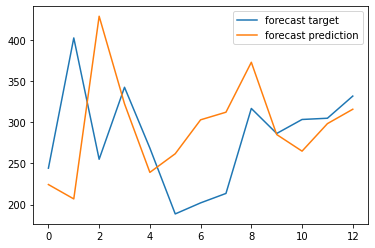

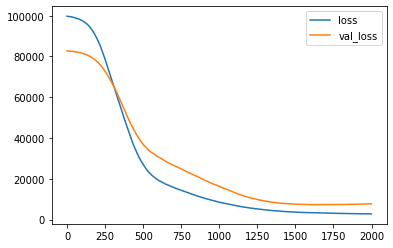

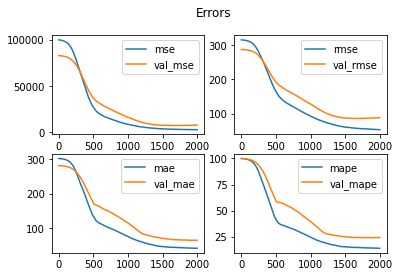

In [17]:
trainDFScaled, testDFScaled, trainDF, testDF = cargarData1()
trainXScaled, trainY, testXScaled, testY = generateFinalData(bestModel['delayedSteps'], 1, trainDFScaled, testDFScaled, trainDF, testDF)
trainXScaled, testXScaled = reshapeXdata(trainXScaled, testXScaled)
validation_target = testY[:]
validation_predictions = saved_model.predict(testXScaled[:,:])
fig, ax = plt.subplots(1, 1)
ax.plot(validation_target, label='forecast target')
ax.plot(validation_predictions, label='forecast prediction')
ax.legend()

plotLoss(history)
plotErrors(history)